<a href="https://colab.research.google.com/github/SeoyoungOhMe/BiometricsSecurity/blob/main/02_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Detection

In [3]:
from google.colab import files

# 파일 업로드하기
uploaded = files.upload()

# 업로드한 파일 확인하기
for filename in uploaded.keys():
    print('업로드된 파일 "{name}" 길이: {length} 바이트'.format(
        name=filename, length=len(uploaded[filename])))

Saving mark1.png to mark1 (1).png
Saving mark2.jpg to mark2 (1).jpg
Saving mark3.jpg to mark3.jpg
업로드된 파일 "mark1 (1).png" 길이: 3112120 바이트
업로드된 파일 "mark2 (1).jpg" 길이: 68843 바이트
업로드된 파일 "mark3.jpg" 길이: 38404 바이트


In [4]:
!ls

'mark1 (1).png'   mark1.png  'mark2 (1).jpg'   mark2.jpg   mark3.jpg   sample_data


In [9]:
!pwd

/content


In [13]:
!mkdir images2 models2
!mv mark* ./images2

In [14]:
!ls images2

'mark1 (1).png'   mark1.png  'mark2 (1).jpg'   mark2.jpg   mark3.jpg


In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(1800, 1200, 3)
(960, 640, 3)


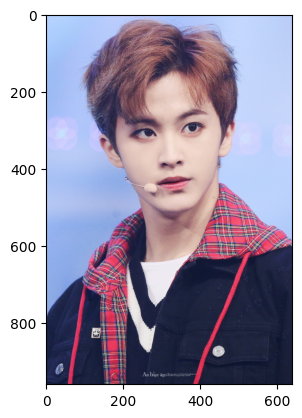

In [25]:
img_bgr = cv2.imread('./images2/mark1.png')
print(img_bgr.shape)
w = img_bgr.shape[1]

fx = 640 / w
fy = fx

img_bgr = cv2.resize(img_bgr, None, fx=fx, fy=fy)
print(img_bgr.shape)
img_show = img_bgr.copy() # 출력용 이미지 복사

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)) # bgr -> rgb

In [26]:
import dlib

In [30]:
detector_hog = dlib.get_frontal_face_detector() # detector 선언

In [28]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) # (image, num of img pyramid)

In [32]:
print(dlib_rects)
print(type(dlib_rects))

rectangles[[(200, 231) (468, 498)]]
<class '_dlib_pybind11.rectangles'>


In [34]:
for dlib_rect in dlib_rects:
  l, t = dlib_rect.left(), dlib_rect.top()
  w, h = dlib_rect.width(), dlib_rect.height()
  print(l, t, w, h)

200 231 269 268


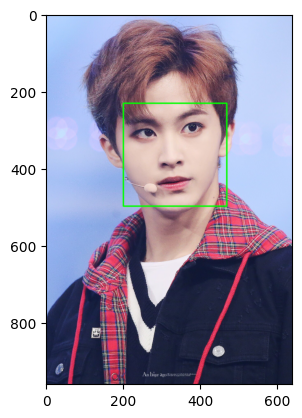

In [33]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_rgb, (l,t), (r,b), # 좌 상단, 우 하단
									(0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(img_rgb)
plt.show()

## Face embedding으로 내 얼굴 벡터 찾기

In [35]:
!pip install face-recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=7bc95ab20450fe68098ef744248d70505604c254beac718e37825f580f4901f1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


array([[[182, 209, 254],
        [184, 211, 255],
        [182, 209, 254],
        ...,
        [186, 205, 247],
        [186, 205, 247],
        [186, 205, 247]],

       [[182, 209, 254],
        [183, 210, 255],
        [182, 209, 254],
        ...,
        [186, 205, 247],
        [186, 205, 247],
        [186, 205, 247]],

       [[181, 208, 253],
        [183, 210, 255],
        [182, 209, 254],
        ...,
        [186, 205, 247],
        [186, 205, 247],
        [186, 205, 247]],

       ...,

       [[ 19,  27,  63],
        [ 20,  28,  64],
        [ 17,  25,  61],
        ...,
        [ 24,  31,  55],
        [ 26,  32,  56],
        [ 27,  33,  57]],

       [[ 21,  29,  65],
        [ 20,  28,  64],
        [ 18,  26,  62],
        ...,
        [ 25,  31,  55],
        [ 27,  32,  56],
        [ 27,  33,  57]],

       [[ 24,  32,  68],
        [ 22,  30,  66],
        [ 20,  28,  64],
        ...,
        [ 25,  31,  55],
        [ 26,  32,  56],
        [ 26,  32,  56]]], dtype=uint8)
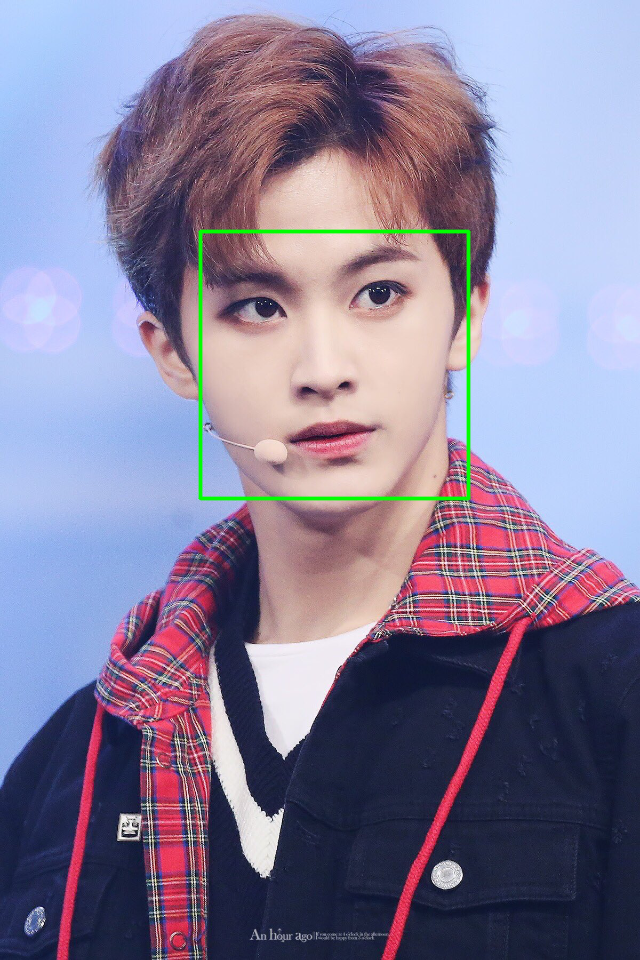

In [40]:
img_rgb

In [41]:
import face_recognition

locations = face_recognition.face_locations(img_rgb)
print(locations) # top, left, buttom, right

[(206, 491, 527, 170)]


In [44]:
encodings = face_recognition.face_encodings(img_rgb, locations)
# [array([-0.10901316,  0.18174323,  0.1505409 , -0.03726797, -0.10857654,
#          0.0160559 , -0.11786638, -0.02365334,  0.03876729, -0.13380444,
#          0.25561023, -0.04410091, -0.27728927, -0.09361519,  0.03026241,
#          0.12527037, -0.06447281, -0.1169026 , -0.10001266, -0.09781723,
#          ...

print(len(encodings)) # 1
print(len(encodings[0])) # 128
print(encodings)

1
128
[array([-0.11992118,  0.12060621,  0.00368857, -0.08431812, -0.16310407,
       -0.02311505, -0.096471  , -0.13725975,  0.08973454, -0.1993164 ,
        0.20745853, -0.13665572, -0.25794873, -0.00558998, -0.03446976,
        0.19146055, -0.19461799, -0.18578917, -0.03176552,  0.0022807 ,
        0.07390316,  0.07527858,  0.02354308,  0.08389524, -0.0752032 ,
       -0.34369048, -0.12031338, -0.0384084 , -0.04322442, -0.05885556,
       -0.03370351,  0.0118928 , -0.20175165, -0.00704676,  0.03609132,
        0.10816352, -0.0099479 , -0.08000758,  0.16427395,  0.00314978,
       -0.25264785,  0.05339159,  0.11379196,  0.26580772,  0.12246746,
        0.09031129, -0.02230629, -0.19354554,  0.11002663, -0.1592399 ,
        0.09794626,  0.13910915,  0.08440805,  0.00335141,  0.00619842,
       -0.12162069,  0.01355615,  0.18921626, -0.17952166,  0.06339055,
        0.13458285, -0.07533535,  0.02401313, -0.16896328,  0.30922961,
        0.097876  , -0.12328346, -0.20213097,  0.14162707

In [45]:
!nvidia-smi

Wed Mar 27 06:16:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              33W /  70W |    183MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 내 얼굴 검색하기


### 얼굴 DB 만들기

In [46]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz  # CLI download --> server
!tar zxvf lfw.tgz

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Aiken/Clay_Aiken_

In [47]:
import os
from os.path import join
from glob import glob
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition
from tqdm.notebook import tqdm

def show(img_bgr):
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()

In [48]:
lfw_dir = './lfw'
list_human = sorted(glob(join(lfw_dir, '*')))
print(list_human[:3])
# ['./lfw/AJ_Cook', './lfw/AJ_Lamas', './lfw/Aaron_Eckhart']

list_jpg = sorted(glob(join(lfw_dir, '*/*.jpg')))
print(len(list_jpg), list_jpg[:10])
# 13233 ['./lfw/AJ_Cook/AJ_Cook_0001.jpg', './lfw/AJ_Lamas/AJ_Lamas_0001.jpg', './lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg', './lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg', './lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg', './lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg', './lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg', './lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg', './lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg', './lfw/Aaron_Pena/Aaron_Pena_0001.jpg']

# 전체 얼굴 이미지 로딩하기
list_img = []
for jpg_path in tqdm(list_jpg):
    list_img.append(cv2.imread(jpg_path, 1))
np_imgs = np.array(list_img)
print(np_imgs.shape)
# (13233, 250, 250, 3)

['./lfw/AJ_Cook', './lfw/AJ_Lamas', './lfw/Aaron_Eckhart']
13233 ['./lfw/AJ_Cook/AJ_Cook_0001.jpg', './lfw/AJ_Lamas/AJ_Lamas_0001.jpg', './lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg', './lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg', './lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg', './lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg', './lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg', './lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg', './lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg', './lfw/Aaron_Pena/Aaron_Pena_0001.jpg']


  0%|          | 0/13233 [00:00<?, ?it/s]

(13233, 250, 250, 3)


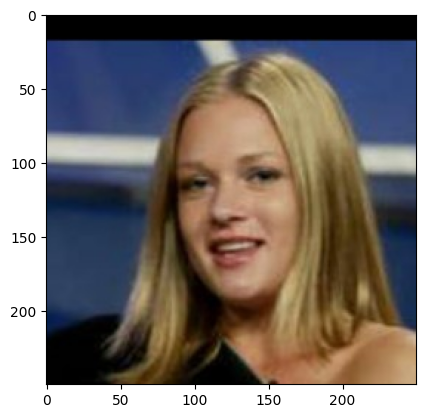

In [49]:
show(list_img[0])

In [50]:
np_embs = np.zeros((len(list_img), 128))

for idx, img in enumerate(tqdm(list_img)):
    locations = face_recognition.face_locations(img)
    encodings = face_recognition.face_encodings(img, locations)
    if len(encodings) > 0:
        np_embs[idx] = encodings[0]

print(np_embs.shape)
# (13233, 128)

  0%|          | 0/13233 [00:00<?, ?it/s]

(13233, 128)


### 내 얼굴과 LFW DB 의 얼굴 비교하기

(900, 600, 3)
(494, 400, 3)
(200, 325, 3)


  0%|          | 0/3 [00:00<?, ?it/s]

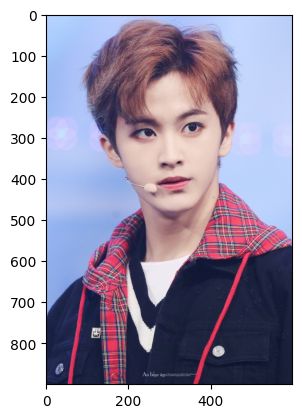

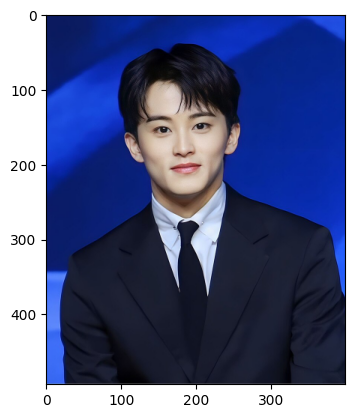

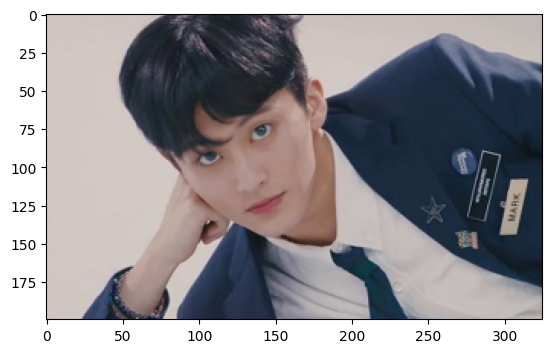

In [52]:
# my image

list_imgs_mark = ['images2/mark1.png', 'images2/mark2.jpg', 'images2/mark3.jpg']

face_path = list_imgs_mark
list_img_user = [cv2.resize(cv2.imread(p), None, fx=0.5, fy=0.5) for p in face_path]
for img in list_img_user:
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    print(img.shape)

np_embs_user = np.zeros((len(list_img_user), 128))

for idx, img in enumerate(tqdm(list_img_user)):
    locations = face_recognition.face_locations(img)
    encodings = face_recognition.face_encodings(img, locations)
    if len(encodings) > 0:
        np_embs_user[idx] = encodings[0]
    else:
        print(idx, 'no face')


In [53]:
np_embs_user.shape

(3, 128)

In [54]:
# A = [a, b]
# B = [c, d]
# ||A - B||^2 = [np.sqrt(a - c)^2, np.sqrt(b - d)^2]

In [55]:
# 0번 이미지와 lfw db 의 거리 계산
np_dist_user_db = np.linalg.norm(np_embs_user[0] - np_embs, axis=1)

# 0번 이미지와 user 이미지 전체의 거리 계산
np_dist_user_user = np.linalg.norm(np_embs_user[0] - np_embs_user, axis=1)

# lfw db 1번 이미지와 전체 db의 거리 계산
np_dist_db_db = np.linalg.norm(np_embs[1] - np_embs, axis=1)

In [56]:
print(np_dist_user_user)
# [0.        0.3698963 0.2985193]

[0.         0.49375951 0.42950623]


In [57]:
print(np_dist_user_db.shape)
print(np_dist_user_db.mean(), np_dist_user_db.min(), np_dist_user_db.max())

(13233,)
0.9130283101867771 0.5035433238220196 1.5133762951723664


In [58]:
print(np_dist_user_db)

[0.83692106 0.9120571  1.0567441  ... 1.06095928 0.89183331 0.94134817]


0.5035433238220196


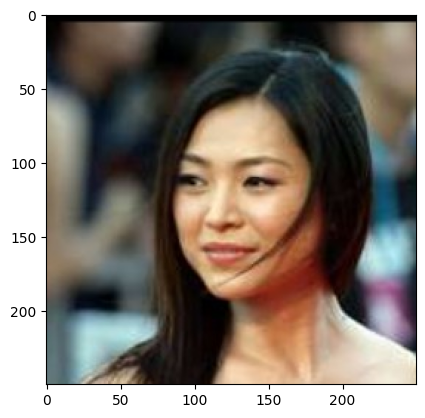

In [59]:
print(np_dist_user_db.min()) # 0.43269961209740215
show(list_img[np_dist_user_db.argmin()])